> In this notebook, I want to reveal a comprehensive notebook to follow how to preprocess and analyze the dataset to make it ready for training. I will be appreciated if you **UPVOTE** this notebook to make it a popular one. 
> 
> 
> Let's start with importing the required packages and the dataset itself.

In [ ]:
# linear algebra
import numpy as np 
# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
house_sales = pd.read_csv("../input/housesalesprediction/kc_house_data.csv")
house_sales.head(4)

In [ ]:
#Checking the null value count for each columns. There is no missing values
total = house_sales.isnull().sum().sort_values(ascending=False)
total

                                                          Analyze Steps:

> Describe the dataset
> 
> Handling null values
> 
> Deal with categorical variables ?
> 
> HeatMap
> 
> Drop some columns
> 
> Divide the dataset into x(input) and y(output)
> 
> Analyze the output distribution
> 
> Analyze the input variables
> 
> Feature selection
> 
> Split the dataset into training and test dataset
> 
> Trainig the model with training dataset
> 
> Predict the test dataset 

# Understanding the Dataset

In [ ]:
house_sales.columns

> It seems more logical to delete the unnecessary columns before putting my dataset into a heatmap. My initial step is to handle some info and descriptions. 

In [ ]:
house_sales.shape

In [ ]:
house_sales.describe()

In [ ]:
house_sales.info()

In [ ]:
house_sales['waterfront'].value_counts()

In [ ]:
house_sales['view'].value_counts()

In [ ]:
house_sales["yr_renovated"].value_counts()

> Those things reveal us to make some initial handling to prepare the data for the heatmap. 
> 
> 1- Drop the id, view and waterfront, sqft_living15, sqft_lot15 columns directly.
> 
> 2- Combine the yr_built and yr_renovated into one column 

In [ ]:
df_house = house_sales.copy()
df_house = df_house.drop(["id","waterfront","view","sqft_living15", "sqft_lot15"],axis=1)

In [ ]:
# Take the renovated years for the age of the building
df_house["year"] = df_house[["yr_built","yr_renovated"]].max(axis=1)

In [ ]:
df_house["date"] = df_house["date"].str[:4].astype(int)

In [ ]:
df_house.head(4)

In [ ]:
# Instead of a year column, I create a new column called age of the built and drop the other unrequired columns
df_house["age"] = df_house["date"] - df_house["year"]
df_house = df_house.drop(["date","yr_built","yr_renovated"], axis=1)

In [ ]:
df_house.head(4)

> **HeatMap** is the best way to get a quick overview of our dataset and its relationships. Plot rectangular data as a color-encoded matrix. This is an Axes-level function and will draw the heatmap into the currently-active 


**heatmap class:** 

vmin, vmaxfloats, optional: Values to anchor the colormap, otherwise they are inferred from the data and other keyword arguments.

In [ ]:
corr = df_house.corr()
f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(corr, vmax=.8, square = True); 

In [ ]:
cols = corr.nlargest(15,'price')['price'].index
cm = np.corrcoef(df_house[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize = (12,9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

> According to this magic HeatMap correlation plot: 
> 
> 1. sqft_living, grade, sqft_above and bathrooms are highly correlated to price of the houses
> 2. sqrt_living and sqrt_above are also highly correlated with each other. 
> 3. Age of the built seems not correlated as anticipated due to the renovation date

Scatter plots between 'price' and correlated variables:

In [ ]:
sns.set()
correlated_columns = ["price","sqft_living", "grade", "sqft_above","bathrooms"]
sns.pairplot(df_house[correlated_columns], size = 2.5)
plt.show()

The pairplots reveals some outliers in the dataset. However,  I want to jump to build my multiple linear regressin model immediately. 

* LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.


* Multiple linear regression attempts to model the relationship between two or more features and a response by fitting a linear equation to observed data.

X (feature matrix) = a matrix of size n X p where x_{ij} denotes the values of jth feature for ith observation.

y (response vector) = a vector of size n


                                            4 Basic Assumptions for linear regression models: 

1.)  Linear relationship: Look at the scatter plot 

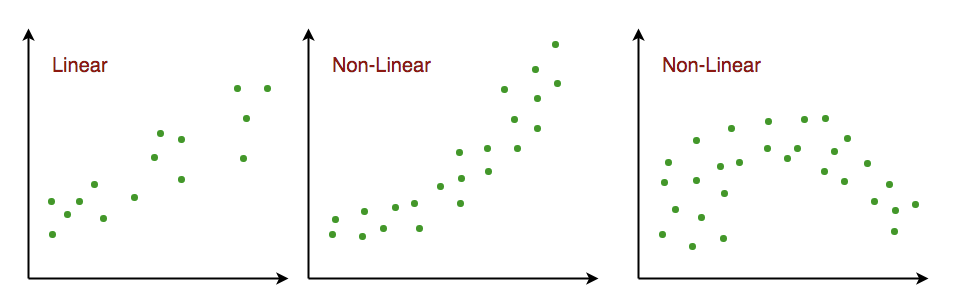

2.)  Little or no multi-collinearity:  Multicollinearity occurs when the features (or independent variables) are not independent from each other.

3.)  Little or no auto-correlation: Autocorrelation occurs when the residual errors are not independent from each other. 

4.) Homoscedasticity: Homoscedasticity describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables and the dependent variable) is the same across all values of the independent variables.

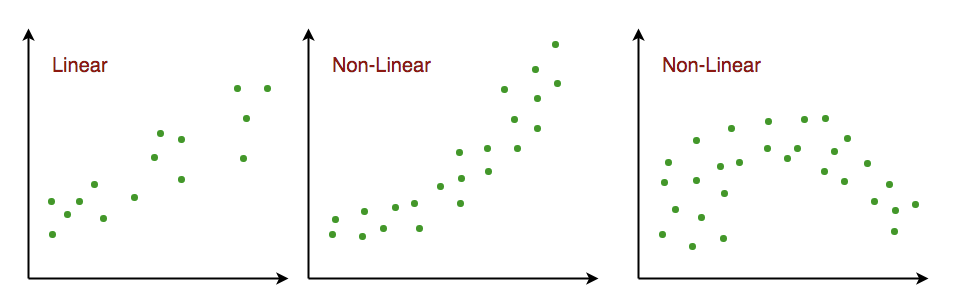


> There are mainly 6 steps to build a multiple linear regression from such a dataset: 
> 
> 1. Dividing the dataset X (independent variables) vs y (dependent variables)
> 2. Encoding the categorical variables. Avoiding the dummy variables
> 3. Splitting the dataset into trainin and test datasets. 
> 4. Fitting the multiple linear regression model to our training set.
> 5. Predicting the test dataset. Find the accuracy of the model
> 6. Building the optimal Model using Backward Elimination

In [ ]:
df_house = df_house.drop(["year","zipcode","lat", "long"], axis=1)
df_house.head(4)

In [ ]:
X= df_house.iloc[:,1:].values
y= df_house.iloc[:,0].values

In [ ]:
X

Splitting the dataset into the Training and Test dataset train_set_split: Split arrays or matrices into random train and test subsets random_state değeri sonuçların her seferinde aynı çıkmasını sağlamak için kullanılıyor.
%20 of the dataset to the test set

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

Fitting multiple Linear Regression model to our Train set. Create an object called regressor in the LinearRegression class... 
Fit the linear regression model to the training set... We use the fit method the arguments of the fit method will be training sets

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() 
regressor.fit(X_train,y_train)

In [ ]:
y_pred= regressor.predict(X_test)

In [ ]:
regressor.predict([[3, 2.25, 2570, 7242, 2, 3, 7,2170,400,23]])

**Backward Elimination Method**: 

In some situations, some of the features have little impact on the result. So that they should be eliminated to prevent the shadow on the output. So building an optimal model can be achieved by using Backward Elimination. 
The backward elimination function will give us the optimal variables from the dataset

**Ordinary least squares:** 
The regressor_OLS object will be created by statsmodels module, endog is the dependent variable, exog is the number of observations


Beta0 has x^0=1. Add a column of for the the first term of the MultiLinear Regression equation.


In [ ]:
df_house.head(4)

In [ ]:
import statsmodels.regression.linear_model as lm
#The 0th column contains only 1 in each rows 
X= np.append(arr = np.ones((21613,1)).astype(int), values = X, axis=1) 
X_opt= X[:, [0,1,2,3,4,5,6,7,8,9,10]] 
regressor_OLS=lm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary() 

Look at the highest p-value again. It depends on the significance level determined. If your significance level is 0.05, it needs to remove this one. But in this case there seems no unrequired feature. 

Please comment on this notebook especially how to deal with the Warning on OLS Regression result. 

**References**: 

https://medium.com/pursuitnotes/day-1-data-preprocessing-1c7d5b0b0eb7

https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

https://www.kaggle.com/burhanykiyakoglu/predicting-house-prices

Regularization: https://en.wikipedia.org/wiki/Regularization_(mathematics)